In [86]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [87]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [88]:
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

/Users/chodaehee/.keras/datasets/cats_and_dogs_filtered/train
/Users/chodaehee/.keras/datasets/cats_and_dogs_filtered/validation


In [89]:
# directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats') 
print(train_cats_dir)

# directory with our training dog pictures 
train_dogs_dir = os.path.join(train_dir, 'dogs')  
print(train_dogs_dir)

# directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  
print(validation_cats_dir)

# directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  
print(validation_dogs_dir)

/Users/chodaehee/.keras/datasets/cats_and_dogs_filtered/train/cats
/Users/chodaehee/.keras/datasets/cats_and_dogs_filtered/train/dogs
/Users/chodaehee/.keras/datasets/cats_and_dogs_filtered/validation/cats
/Users/chodaehee/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [90]:
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [91]:
# parameter Initialization
batch_size = 16
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [92]:
# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [93]:
# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                        rotation_range=0.3,
                                        width_shift_range=0.1,
                                        height_shift_range=0.1,
                                        zoom_range=0.2,
                                        horizontal_flip=True, 
                                        vertical_flip=False)

In [94]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                        directory=train_dir,
                                                        shuffle=True,
                                                        target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [95]:
train_data_gen[0][0].shape

(16, 256, 256, 3)

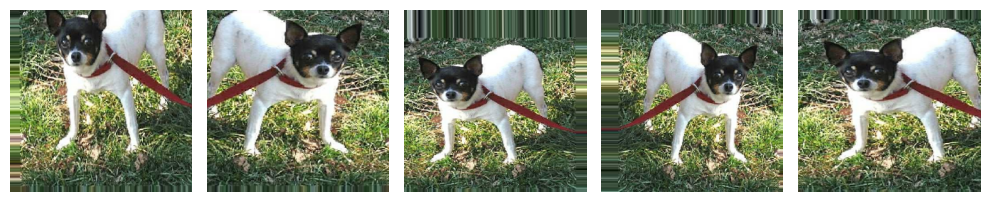

In [96]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [97]:
# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

In [98]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                    directory=validation_dir,
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    class_mode='binary')

Found 1000 images belonging to 2 classes.


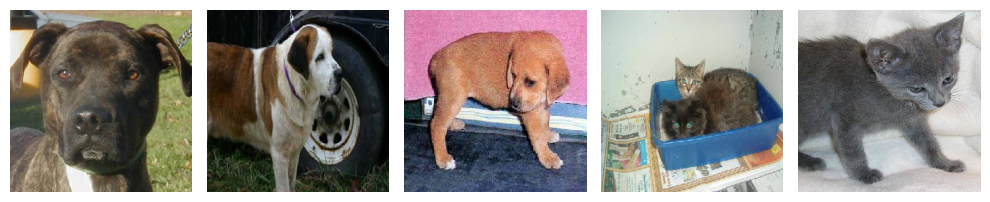

In [99]:
sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

In [100]:
_[:5] # 정답 데이터

array([1., 1., 1., 0., 0.], dtype=float32)

In [101]:
def build_vgg16():
    input_layer = tf.keras.layers.Input(shape=(256, 256, 3))
    
    # Block 1
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPool2D((2, 2))(x)
    
    # Block 2
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPool2D((2, 2))(x)
    
    # Block 3
    x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPool2D((2, 2))(x)
    
    # Block 4
    x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPool2D((2, 2))(x)
    
    # Block 5
    x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPool2D((2, 2))(x)
    
    # FC Layers
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(4096, activation='relu')(x)
    x = tf.keras.layers.Dense(4096, activation='relu')(x)
    out_layer = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    
    model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
    
    return model

model = build_vgg16()
model.summary()


Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_117 (Conv2D)         (None, 256, 256, 64)      1792      
                                                                 
 conv2d_118 (Conv2D)         (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 128, 128, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_119 (Conv2D)         (None, 128, 128, 128)     73856     
                                                                 
 conv2d_120 (Conv2D)         (None, 128, 128, 128)     147584    
                                                           

In [102]:
loss_function = tf.keras.losses.BinaryCrossentropy(from_logits=True)
optimize=tf.keras.optimizers.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy

model.compile(loss=loss_function,
                optimizer=optimize,
                metrics=[metric])

callbacks_list= [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]

In [103]:
history = model.fit(
        train_data_gen,
        steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size,
        epochs=epochs,
        validation_data=val_data_gen,
        # callbacks=callbacks_list,
        validation_freq=1)

Epoch 1/5
125/125 [==============================] - 790s 6s/step - loss: 31536352.0000 - binary_accuracy: 0.5185 - val_loss: 79.6399 - val_binary_accuracy: 0.5000
Epoch 2/5
125/125 [==============================] - 861s 7s/step - loss: 4.5563 - binary_accuracy: 0.5010 - val_loss: 0.8271 - val_binary_accuracy: 0.5000
Epoch 3/5
125/125 [==============================] - 841s 7s/step - loss: 0.8312 - binary_accuracy: 0.4820 - val_loss: 0.6986 - val_binary_accuracy: 0.5000
Epoch 4/5
125/125 [==============================] - 864s 7s/step - loss: 0.7698 - binary_accuracy: 0.4980 - val_loss: 0.6944 - val_binary_accuracy: 0.5000
Epoch 5/5
125/125 [==============================] - 778s 6s/step - loss: 0.9698 - binary_accuracy: 0.4880 - val_loss: 0.8814 - val_binary_accuracy: 0.5000


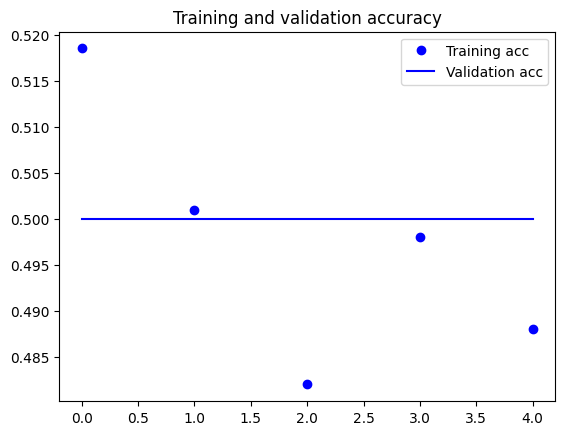

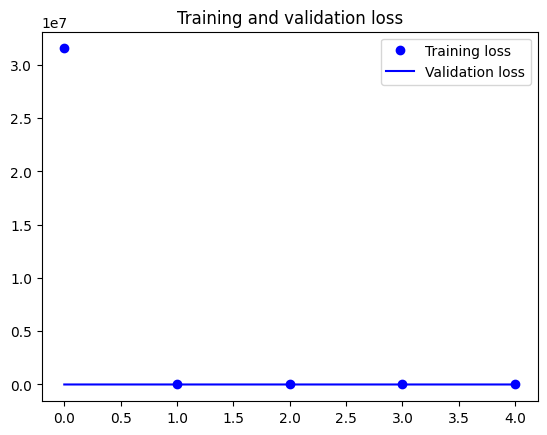

In [105]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


## 다양한 방법을 사용하여 모델의 성능 올리기

In [106]:
# hyperparameter 설정

batch_size = 32
epochs = 10
learning_rate = 0.001
momentum = 0.9
dropout_rate = 0.5

In [107]:
# 데이터 generator 생성

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 augmentation 설정
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255) 

In [109]:
# 모델 구현
from tensorflow.keras.layers import Add

def build_resnet_block(input_tensor, filters, kernel_size=3):
    x = tf.keras.layers.Conv2D(filters, kernel_size, padding='same')(input_tensor)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    
    x = tf.keras.layers.Conv2D(filters, kernel_size, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    
    x = Add()([x, input_tensor])
    x = tf.keras.layers.ReLU()(x)
    
    return x

def build_custom_model():
    input_layer = tf.keras.layers.Input(shape=(224, 224, 3))
    
    x = tf.keras.layers.Conv2D(64, (7, 7), strides=2, padding='same')(input_layer)
    x = tf.keras.layers.MaxPool2D((3, 3), strides=2, padding='same')(x)
    
    # Residual Blocks
    x = build_resnet_block(x, 64)
    x = build_resnet_block(x, 64)
    
    x = tf.keras.layers.Conv2D(128, (3, 3), strides=2, padding='same')(x)
    x = build_resnet_block(x, 128)
    x = build_resnet_block(x, 128)
    
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)
    out_layer = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    
    model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
    
    return model

In [110]:
# loss function, optimizer, metric 설정 및 모델 컴파일

model = build_custom_model()

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
loss = 'binary_crossentropy'
metrics = ['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [111]:
# 모델 학습
history = model.fit(
        train_data_gen,
        steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size,
        epochs=epochs,
        validation_data=val_data_gen,
        # callbacks=callbacks_list,
        validation_freq=1)

Epoch 1/10
62/62 [==============================] - 45s 717ms/step - loss: 0.8027 - accuracy: 0.5456 - val_loss: 0.6962 - val_accuracy: 0.5000
Epoch 2/10
62/62 [==============================] - 46s 735ms/step - loss: 0.7456 - accuracy: 0.5437 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/10
62/62 [==============================] - 44s 703ms/step - loss: 0.6927 - accuracy: 0.5863 - val_loss: 0.6844 - val_accuracy: 0.5480
Epoch 4/10
62/62 [==============================] - 43s 694ms/step - loss: 0.7060 - accuracy: 0.5556 - val_loss: 0.7031 - val_accuracy: 0.5000
Epoch 5/10
62/62 [==============================] - 47s 750ms/step - loss: 0.6966 - accuracy: 0.5665 - val_loss: 0.6627 - val_accuracy: 0.5580
Epoch 6/10
62/62 [==============================] - 46s 739ms/step - loss: 0.6823 - accuracy: 0.5764 - val_loss: 0.6793 - val_accuracy: 0.5460
Epoch 7/10
62/62 [==============================] - 44s 702ms/step - loss: 0.6643 - accuracy: 0.5863 - val_loss: 0.6355 - val_accuracy: 0.6270

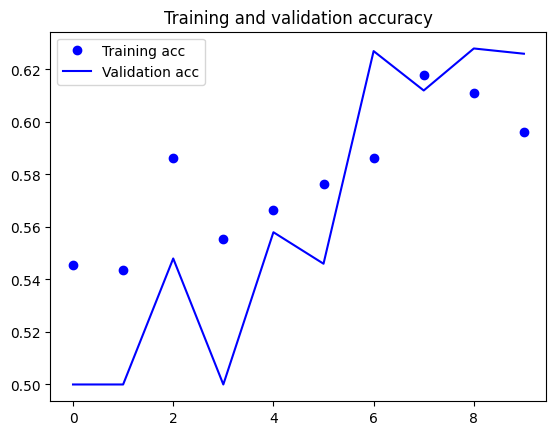

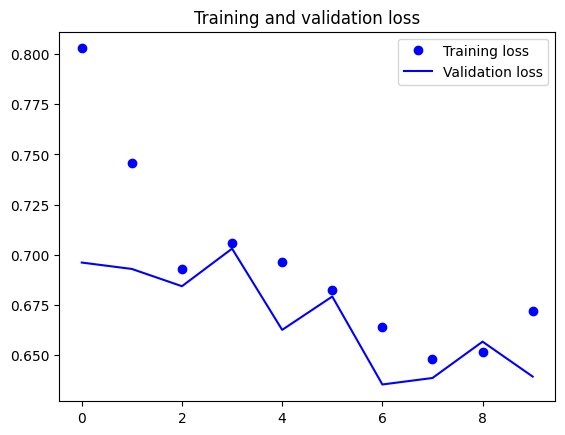

In [113]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()